In [1]:
import  keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Epoch 1/50
1000/1000 [==============================] - 0s 206us/step - loss: 1.4227 - accuracy: 0.5550
Epoch 2/50
1000/1000 [==============================] - 0s 45us/step - loss: 0.6244 - accuracy: 0.6110
Epoch 3/50
1000/1000 [==============================] - 0s 40us/step - loss: 0.4457 - accuracy: 0.8290
Epoch 4/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.3836 - accuracy: 0.8950
Epoch 5/50
1000/1000 [==============================] - 0s 40us/step - loss: 0.3405 - accuracy: 0.9050
Epoch 6/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.3076 - accuracy: 0.9280
Epoch 7/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.2884 - accuracy: 0.9320
Epoch 8/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.2609 - accuracy: 0.9390
Epoch 9/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.2345 - accuracy: 0.9580
Epoch 10/50
1000/1000 [==============================] - 0s 37us/step - 

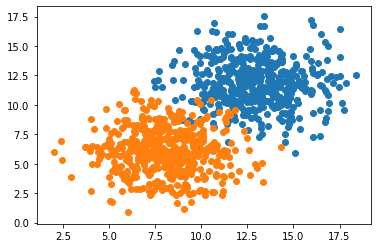

In [2]:
n_pts = 500
np.random.seed(0)

Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T 
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T 

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T 

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=50, shuffle='true')

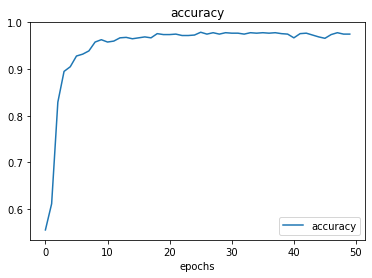

In [3]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.show()

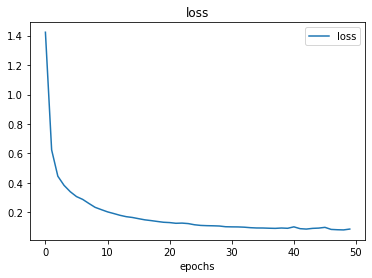

In [4]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['loss'])
plt.show()

In [5]:
def plot_boundry(X, y, model):
    x_span = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
    y_span = np.linspace(min(X[:, 1])-1, max(X[:, 1])+1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    predict_func = model.predict(grid)
    z = predict_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


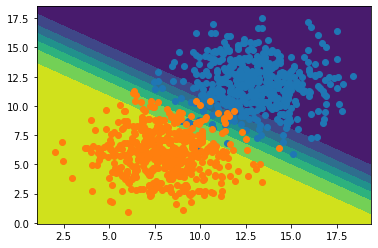

In [6]:
plot_boundry(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is: [[0.8815628]]


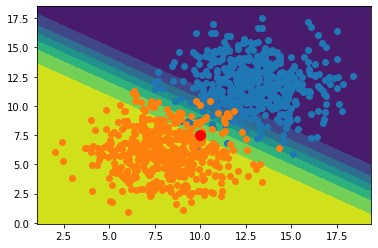

In [7]:
plot_boundry(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 10
y = 7.5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color='red')
print('Prediction is:', prediction)